# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

# What are Missing Values? 

Missing values occur when no data value is stored for a variable in a dataset. They can occur due to various reasons like data entry errors, equipment 
malfunctions, or skipped questions in surveys.

# Missing Values:
Missing values occur when no data value is recorded for a variable in an observation. In a dataset, this might appear as empty cells, NaN (Not a Number), or placeholders like NULL.

# Examples:

- Missing age or income values in a customer dataset.
- Missing test scores in student performance data.

# Why is it Essential to Handle Missing Values?

## Impact on Data Analysis:

- Missing data can skew summary statistics like mean, median, or variance.
- Reduces the reliability of insights.

## Impact on Machine Learning Models:

- Many machine learning algorithms cannot process missing values directly and will raise errors.
- Models trained with missing data may yield inaccurate predictions or biased results.

## Data Quality and Completeness:

- Ensuring data integrity is critical for accurate modeling and analysis.

## Decision Making:

- Handling missing data ensures better decision-making based on complete and consistent datasets.

# Algorithms Not Affected by Missing Values

    ## Certain algorithms can handle missing values inherently:

        -Decision Trees (e.g., CART, Random Forests)
        These algorithms can split data based on available features without requiring imputation.

        - XGBoost (with missing parameter)
        It can handle missing values as part of its decision-making process.

        - k-Nearest Neighbors (k-NN) (with modified distance metrics)
         Missing values are ignored in distance computations.

        - Naive Bayes
        Can handle missing values depending on the implementation (e.g., categorical data).

# Practical Example in Python

## Example Dataset with Missing Values:



In [24]:
import pandas as pd
import numpy as np

# Example dataset
data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, 28],
    'Income': [50000, 60000, None, 80000]
})

print("Dataset with Missing Values:")
print(data)


Dataset with Missing Values:
      Name   Age   Income
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  30.0      NaN
3    David  28.0  80000.0


# Handling in Algorithms like Random Forest:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Simulate categorical target
data['Target'] = [0, 1, 0, 1]

# Splitting data (excluding missing values manually here)
X = data[['Age', 'Income']]
y = data['Target']

# Fill missing values with mean for simplicity (if necessary)
X = X.fillna(X.mean())

print("X: ",X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training Data Class Distribution:")
print(y_train.value_counts())

print("TestingData Class Distribution:")
print(y_test.value_counts())

print("Testing - X_test Data Class Distribution:")
print(X_test.value_counts())

# Random Forest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)
print("Predictions:", predictions)




X:           Age        Income
0  25.000000  50000.000000
1  27.666667  60000.000000
2  30.000000  63333.333333
3  28.000000  80000.000000
Training Data Class Distribution:
Target
0    2
1    1
Name: count, dtype: int64
TestingData Class Distribution:
Target
1    1
Name: count, dtype: int64
Testing - X_test Data Class Distribution:
Age        Income 
27.666667  60000.0    1
Name: count, dtype: int64
Predictions: [0]


# Key Takeaways

- **The output [0]** is primarily due to the small, imbalanced training data and the behavior of ensemble methods like Random Forest, which favor the majority class when limited data is available.
- **Addressing dataset size**, balance, and sampling methods can improve the model’s ability to generalize.
- **Missing Values:** Common issue in datasets where observations lack specific data points.
- **Importance of Handling:** Ensures accurate, reliable analysis and modeling.
- **Resilient Algorithms:** Decision Trees, Random Forest, and XGBoost handle missing values effectively without preprocessing in certain scenarios.

# Q2:List down techniques used to handle missing data.  Give an example of each with python code

Handling missing data is a critical step in data preprocessing to ensure the accuracy and reliability of analysis or model predictions. Below are common techniques for dealing with missing values, along with Python examples for each.

1. Deletion of Missing Data
   
    **a) Remove Rows with Missing Values**
        This is useful when missing data is minimal and unlikely to bias the analysis.

In [30]:
import pandas as pd

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})

# Drop rows with missing values
cleaned_data = data.dropna()
print("After Dropping Rows:\n", cleaned_data)


After Dropping Rows:
      A    B
1  2.0  5.0
3  4.0  7.0


**b) Remove Columns with Missing Values**

    Used when an entire column has too many missing values.

In [35]:
import pandas as pd

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})
print(" Data",data)
# Drop columns with missing values
cleaned_data = data.dropna(axis=1)
print("After Dropping Columns:\n", cleaned_data)


 Data      A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0
After Dropping Columns:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


# Removing Missing Data by Droping Rows:

In [39]:
import pandas as pd
# Sample dataset
data = {'A': [1, 2, None], 'B': [4, None, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)
# Drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)


     A    B  C
0  1.0  4.0  7


# 2. Imputation
    **a) Fill Missing Values with Mean**
    
         Appropriate for numerical data.

In [41]:
import pandas as pd

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})
print("Data is : ",data)
# Fill missing values with mean
data['A'] = data['A'].fillna(data['A'].mean())
print("After Mean Imputation:\n", data)


Data is :       A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0
After Mean Imputation:
           A    B
0  1.000000  NaN
1  2.000000  5.0
2  2.333333  6.0
3  4.000000  7.0


# Mean/Median/Mode Imputation:



In [42]:
# Impute missing values with mean
df['A'] = df['A'].fillna(df['A'].mean())
print(df)

     A    B  C
0  1.0  4.0  7
1  2.0  NaN  8
2  1.5  6.0  9


# b) Fill Missing Values with Median

        Useful for skewed distributions.

In [43]:
# Fill missing values with median
data['B'] = data['B'].fillna(data['B'].median())
print("After Median Imputation:\n", data)


After Median Imputation:
           A    B
0  1.000000  6.0
1  2.000000  5.0
2  2.333333  6.0
3  4.000000  7.0


# c) Fill Missing Values with Mode

    Useful for categorical data.

In [45]:
import pandas as pd

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})
print("Data is : ",data)
# Fill missing values with mode
data['A'] = data['A'].fillna(data['A'].mode()[0])
print("After Mode Imputation:\n", data)


Data is :       A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0
After Mode Imputation:
      A    B
0  1.0  NaN
1  2.0  5.0
2  1.0  6.0
3  4.0  7.0


# d) Constant Value Imputation

    Replace missing values with a fixed value (e.g., 0 or "Unknown").

In [46]:
# Fill missing values with a constant
data['B'] = data['B'].fillna(0)
print("After Constant Value Imputation:\n", data)


After Constant Value Imputation:
      A    B
0  1.0  0.0
1  2.0  5.0
2  1.0  6.0
3  4.0  7.0


# e) Predictive Imputation

    Use machine learning models to predict missing values.

In [47]:
from sklearn.impute import SimpleImputer

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})

# Use SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
print("After Predictive Imputation:\n", pd.DataFrame(data_imputed, columns=data.columns))


After Predictive Imputation:
           A    B
0  1.000000  6.0
1  2.000000  5.0
2  2.333333  6.0
3  4.000000  7.0


# Using Predictive Models:

In [56]:
from sklearn.impute import KNNImputer
import numpy as np
# Example data
data = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]])
imputer = KNNImputer(n_neighbors=2)
data_filled = imputer.fit_transform(data)
print(data_filled)

[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


# 3. Interpolation

Fills missing values by estimating them using available data points.

# a) Linear Interpolation

    Useful for time series data.

In [48]:
# Interpolate missing values
data['A'] = data['A'].interpolate(method='linear')
print("After Linear Interpolation:\n", data)


After Linear Interpolation:
      A    B
0  1.0  NaN
1  2.0  5.0
2  3.0  6.0
3  4.0  7.0


# 4. Forward or Backward Fill
Propagates previous or next values to fill missing data.

# a) Forward Fill
    
    Copies the previous value into the missing cell.

In [50]:
# Forward fill
data['A'] = data['A'].fillna(method='ffill')
print("After Forward Fill:\n", data)


After Forward Fill:
      A    B
0  1.0  NaN
1  2.0  5.0
2  3.0  6.0
3  4.0  7.0


C:\Users\ac240\AppData\Local\Temp\ipykernel_31264\386842083.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['A'] = data['A'].fillna(method='ffill')


# Forward Fill/Backward Fill:

In [51]:
# Forward fill
df['B'] = df['B'].fillna(method='ffill')
print(df)

     A    B  C
0  1.0  4.0  7
1  2.0  4.0  8
2  1.5  6.0  9


C:\Users\ac240\AppData\Local\Temp\ipykernel_31264\2586054466.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['B'] = df['B'].fillna(method='ffill')


# b) Backward Fill

Copies the next value into the missing cell.

In [52]:
# Backward fill
data['A'] = data['A'].fillna(method='bfill')
print("After Backward Fill:\n", data)


After Backward Fill:
      A    B
0  1.0  NaN
1  2.0  5.0
2  3.0  6.0
3  4.0  7.0


C:\Users\ac240\AppData\Local\Temp\ipykernel_31264\4238143513.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['A'] = data['A'].fillna(method='bfill')


# 5. Indicator Variable for Missing Data

    Add a new column to indicate whether data was missing.

In [53]:
# Add an indicator column
data['A_missing'] = data['A'].isnull()
print("After Adding Indicator:\n", data)


After Adding Indicator:
      A    B  A_missing
0  1.0  NaN      False
1  2.0  5.0      False
2  3.0  6.0      False
3  4.0  7.0      False


# 6. Advanced Techniques

**a) K-Nearest Neighbors Imputation (KNN)**

    Fills missing values by considering the values of k-nearest neighbors.

In [54]:
from sklearn.impute import KNNImputer

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
data_imputed = knn_imputer.fit_transform(data)
print("After KNN Imputation:\n", pd.DataFrame(data_imputed, columns=data.columns))


After KNN Imputation:
      A    B
0  1.0  6.0
1  2.0  5.0
2  3.0  6.0
3  4.0  7.0


**b) Multivariate Imputation by Chained Equations (MICE)**

    Iteratively estimates missing values using regression models for other features.

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Example dataset
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]})

# Apply Iterative Imputer
mice_imputer = IterativeImputer(random_state=42)
data_imputed = mice_imputer.fit_transform(data)
print("After MICE Imputation:\n", pd.DataFrame(data_imputed, columns=data.columns))


After MICE Imputation:
           A         B
0  1.000000  4.000007
1  2.000000  5.000000
2  2.999981  6.000000
3  4.000000  7.000000


# Key Considerations

## Type of Missing Data:

    - **MCAR (Missing Completely at Random):** Safe to delete or impute.
    - **MAR (Missing at Random):** Imputation techniques like MICE or KNN are effective.
    - **MNAR (Missing Not at Random):** Requires domain knowledge to handle.

## Impact of Imputation:

- Choose the technique based on the nature of the data and the analysis goal.
- Overuse of imputation may introduce bias.

By selecting the appropriate technique, you can effectively handle missing data and maintain the integrity of your dataset for analysis or machine learning.

[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


# Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

# What is Imbalanced Data?
Imbalanced data refers to datasets where the distribution of classes is significantly skewed, meaning one class (majority class) dominates over the other(s) (minority class).

# Imbalanced Data: 

When one class significantly outnumbers other classes in the dataset, it leads to imbalance.

Example: In a medical diagnosis dataset, 95% of patients might not have a specific disease (majority class), while only 5% do (minority class).




# Characteristics of Imbalanced Data

**Skewed Class Distribution:** Skewed model predictions.

    The number of observations in one class is much higher than in the other(s).

**Bias Towards Majority Class:** Poor model performance for minority classes.

    Models trained on imbalanced data often predict the majority class more accurately while performing poorly on the minority class.

**Metrics like accuracy become misleading.**

## Real-World Examples:

- Fraud detection (fraudulent transactions are rare).
- Disease prediction (rare diseases).
- Churn prediction (few customers churn).

# Why is Imbalanced Data a Problem?

## 1. Biased Model Predictions
Machine learning models often optimize for overall accuracy. In an imbalanced dataset, predicting only the majority class can still result in high accuracy but poor performance on the minority class.
Example: In a dataset with 95% of instances being Class 0 and 5% being Class 1, predicting Class 0 for every instance results in 95% accuracy but 0% recall for Class 1.
## 2. Poor Minority Class Performance
Metrics like precision, recall, and F1-score for the minority class are often very low.
This is especially problematic in critical applications like medical diagnosis or fraud detection, where missing minority class predictions can have severe consequences.
## 3. Underrepresentation of Important Cases
Models fail to learn meaningful patterns from the minority class because it is underrepresented in the training data.

# Consequences of Not Handling Imbalanced Data

## False Negatives:

In critical scenarios (e.g., disease diagnosis), missing true positives can lead to life-threatening consequences.

## Misleading Metrics:

Metrics like accuracy become unreliable. A model predicting only the majority class may still achieve high accuracy despite poor performance.

## Lack of Generalization:

Models trained on imbalanced data may not generalize well to new, unseen datasets.

## Inequity in Decision-Making:

Skewed predictions can result in biased decisions, particularly in areas like hiring, loan approvals, or criminal justice.


# How to Identify Imbalanced Data?

**Class Distribution:**

Check the distribution of target classes using a bar plot or a value count.

Class Distribution:
 Target
0    7
1    3
Name: count, dtype: int64


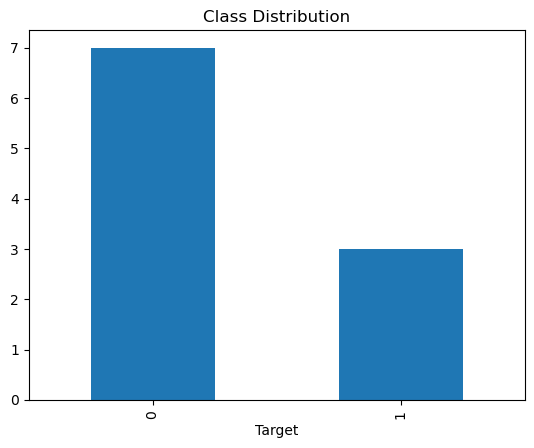

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = pd.DataFrame({'Target': [0, 0, 0, 0, 1, 1, 0, 0, 1, 0]})
print("Class Distribution:\n", data['Target'].value_counts())

# Plot class distribution
data['Target'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()


# Evaluation Metrics:

Use precision, recall, F1-score, and confusion matrix to detect imbalanced performance.

# Conclusion

## Imbalanced data needs to be handled carefully to:

1. Improve the model's ability to predict the minority class.

2. Avoid bias in decision-making.

3. Achieve reliable and meaningful insights from machine learning models.

By recognizing and addressing the challenges posed by imbalanced datasets, you can improve the fairness and accuracy of your predictions, especially in critical real-world applications.

# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and downsampling are required.

# 1. What is Up-sampling?
Up-sampling refers to increasing the representation of the minority class in an imbalanced dataset by duplicating or generating synthetic samples.

**Up-sampling:** Increasing the minority class instances to balance the dataset.

## Techniques:

**Random Over-Sampling:** Duplicate existing samples of the minority class.
**Synthetic Over-Sampling (e.g., SMOTE):** Create synthetic samples using techniques like interpolation between minority class data points.

## When Required:

When the minority class is underrepresented, making it difficult for the model to learn its patterns.
**Example:** Fraud detection, where fraudulent transactions are rare.

# 2. What is Down-sampling?

Down-sampling refers to reducing the representation of the majority class by randomly removing samples.

**Down-sampling:** Reducing the majority class instances to balance the dataset.

## Techniques:

**Random Under-Sampling:** Randomly drop majority class samples.
**Cluster-Based Under-Sampling:** Retain representative samples of the majority class using clustering.

## When Required:

When the dataset is too large and dominated by the majority class, making it computationally expensive or biased toward the majority class.
**Example:** Customer satisfaction analysis, where most customers are satisfied.




# Examples of Up-sampling and Down-sampling in Python

## Up-sampling Example

In [58]:
from sklearn.utils import resample
import pandas as pd

# Example dataset
data = pd.DataFrame({'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'Target': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]})

# Separate majority and minority classes
majority = data[data['Target'] == 0]
minority = data[data['Target'] == 1]

# Up-sample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine majority class with up-sampled minority class
balanced_data = pd.concat([majority, minority_upsampled])

print("Class Distribution After Up-sampling:")
print(balanced_data['Target'].value_counts())


Class Distribution After Up-sampling:
Target
0    7
1    7
Name: count, dtype: int64


In [7]:
from sklearn.utils import resample
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np

# Create an example dataset
X, y = make_classification(weights=[0.9, 0.1], n_classes=2, n_samples=1000)
print("Original class distribution:", Counter(y))

# Separate the minority and majority classes
X_minority = X[y == 1]
X_majority = X[y == 0]

# Up-sample the minority class
X_minority_upsampled, y_minority_upsampled = resample(
    X_minority, 
    y[y == 1], 
    n_samples=900, 
    replace=True, 
    random_state=42
)

# Combine majority and upsampled minority classes
X_upsampled = np.vstack((X_majority, X_minority_upsampled))
y_upsampled = np.hstack((y[y == 0], y_minority_upsampled))

print("Up-sampled class distribution:", Counter(y_upsampled))


Original class distribution: Counter({0: 898, 1: 102})
Up-sampled class distribution: Counter({1: 900, 0: 898})


## Down-sampling Example

In [59]:
# Down-sample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

# Combine down-sampled majority class with minority class
balanced_data = pd.concat([majority_downsampled, minority])

print("Class Distribution After Down-sampling:")
print(balanced_data['Target'].value_counts())


Class Distribution After Down-sampling:
Target
0    3
1    3
Name: count, dtype: int64


# When to Use Up-sampling or Down-sampling?
## Up-sampling:

- When the minority class is severely underrepresented.
- If losing data from the majority class is unacceptable.
- To improve sensitivity (recall) for the minority class.
- **Use cases:** Fraud detection, rare disease diagnosis.

## Down-sampling:

- When the dataset is too large, making training computationally expensive.
- When the majority class can afford data reduction without losing critical information.
- To balance the dataset for algorithms sensitive to class imbalance.
- **Use cases:** Customer satisfaction analysis, sentiment analysis.

## Advantages and Disadvantages

<table><tr><th>Method	<th>Advantages	<th>Disadvantages</tr>
<tr><td>Up-sampling	<td>Retains all majority class data. Enhances recall.	<td>Risk of overfitting (if duplicate samples are used).</tr>
<tr><td>Down-sampling	<td>Reduces computational cost. Simplifies the dataset.	<td>Risk of losing information from the majority class.</tr></table>
By choosing the appropriate method (up-sampling or down-sampling) based on the dataset and problem, you can effectively handle class imbalance and improve model performance.

# Q5:  What is data Augmentation? Explain SMOTE.

# 1. What is Data Augmentation?

Data Augmentation refers to techniques used to artificially increase the size of a dataset by generating new data samples from the existing ones. These techniques aim to improve model performance by diversifying the training data, especially in scenarios where data is limited or imbalanced.

**Data Augmentation:**

Generating new data samples by modifying existing data. In images, this could involve rotation, flipping, etc.

## Types of Data Augmentation

### a) For Images:

- **Flipping:** Horizontally or vertically flipping an image.
- **Rotation:** Rotating the image by a certain angle.
- **Cropping:** Randomly cropping sections of the image.
- **Noise Addition:** Adding random noise to images.

## Example in Python:



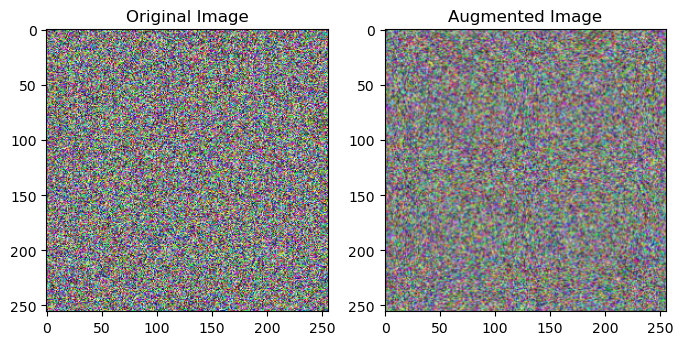

In [64]:
import tensorflow as tf
from tensorflow.keras.layers import RandomRotation, RandomFlip, RandomZoom
import numpy as np
import matplotlib.pyplot as plt

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    RandomRotation(0.2),        # Rotate images by 20%
    RandomFlip("horizontal"),   # Flip images horizontally
    RandomZoom(0.2)             # Zoom images by 20%
])

# Example: Creating a sample image
# Create a random RGB image of shape (256, 256, 3)
img = np.random.rand(256, 256, 3)

# Convert image to a tensor
img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

# Add batch dimension (required for data augmentation layers)
img_tensor = tf.expand_dims(img_tensor, axis=0)

# Apply data augmentation
augmented_img_tensor = data_augmentation(img_tensor)

# Remove the batch dimension for visualization
augmented_img = tf.squeeze(augmented_img_tensor, axis=0)

# Plot the original and augmented images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_img)
plt.show()


### b) For Text:

- **Synonym Replacement:** Replace words with their synonyms.
- **Random Insertion:** Insert new words randomly.
- **Noise Injection:** Add typos or spelling errors.


# 2. What is SMOTE?

SMOTE (Synthetic Minority Oversampling Technique) is a data augmentation technique specifically designed to address imbalanced datasets. It generates synthetic samples for the minority class by interpolating between existing samples.

**SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE generates synthetic samples for the minority class by interpolating between existing instances.

## How SMOTE Works

### Identify Nearest Neighbors:

For each sample in the minority class, SMOTE identifies k nearest neighbors from the same class.

### Generate Synthetic Samples:

Synthetic data points are created by randomly interpolating between the original sample and its neighbors.

### Balanced Dataset:

The synthetic samples are added to the minority class to balance the dataset.

## Advantages of SMOTE

- Avoids overfitting caused by simple duplication of minority samples.
- Works well with numerical data.
- Improves minority class representation, enhancing model sensitivity.

## Limitations of SMOTE

- Can create noisy samples if the minority class overlaps significantly with the majority class.
- Does not address within-class imbalances or complexities (e.g., subclusters).

## SMOTE Example in Python

In [66]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Example dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])  # Imbalanced target

# Apply SMOTE with reduced k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # k_neighbors < number of minority samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to DataFrame for better visualization
resampled_data = pd.DataFrame(X_resampled, columns=['Feature'])
resampled_data['Target'] = y_resampled

print("Original Class Distribution:")
print(pd.Series(y).value_counts())

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Original Class Distribution:
0    7
1    3
Name: count, dtype: int64

Class Distribution After SMOTE:
0    7
1    7
Name: count, dtype: int64


In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({0: 898, 1: 898})


# SMOTE Variants

## Borderline-SMOTE:

    Focuses on creating synthetic samples for minority class samples near the decision boundary.

## ADASYN (Adaptive Synthetic Sampling):

    Focuses more on harder-to-learn samples by generating synthetic data proportionally to the level of difficulty.

## SMOTE-ENN:
    
    Combines SMOTE with Edited Nearest Neighbors (ENN) for noise reduction.

## When to Use SMOTE

    **For Imbalanced Datasets:**
        
        E.g., Fraud detection, rare disease diagnosis.

    **When Minority Class Is Underrepresented:**

        To create a balanced dataset for improved model learning.

    **For Numerical Data:**

        Works well when features are continuous or ordinal.

## Key Takeaways

- Data Augmentation is a broad concept that enhances datasets by generating additional data points.

- SMOTE is a specific oversampling technique used to balance imbalanced datasets by creating synthetic samples for the minority class.

- Proper implementation of SMOTE or other augmentation techniques improves model performance, particularly in scenarios with skewed class distributions.

# Q6:  What are outliers in a dataset? Why is it essential to handle outliers?

# 1. What are Outliers?

Outliers are data points that significantly deviate from other observations in a dataset. They may occur due to variability in the data, measurement errors, or anomalies.

# Examples:

    - A person’s age recorded as 150 in a dataset of human ages.
    - Income of 10,000,000 in a dataset where most incomes range between 30,000 and 100,000.

# 2. Causes of Outliers

## Measurement Errors:

    - Human errors during data entry or sensor malfunctions.

## Natural Variability:

    - Unusual but valid values in the dataset (e.g., extremely high-performing students).

## Anomalous Events:

    - Fraudulent transactions, rare diseases, or extreme weather events.

# 3. Why is it Essential to Handle Outliers?

Impact of Outliers on Data Analysis and Models

### Distorted Summary Statistics:

    Outliers can skew the mean, variance, and standard deviation.

    For example, in income data, a single extreme value can significantly increase the mean.

### Impact on Machine Learning Models:

#### Linear Models (e.g., Linear Regression):

    Sensitive to outliers as they minimize mean squared error.

#### Distance-Based Models (e.g., k-NN, k-Means):

    Distance calculations are heavily influenced by outliers.

#### Tree-Based Models (e.g., Decision Trees, Random Forests):

    Less sensitive but can still be affected if outliers dominate.

#### Reduced Model Accuracy:

    Outliers may cause models to misinterpret patterns and relationships.

#### Misleading Insights:

    Outliers can distort visualizations (e.g., boxplots, scatterplots) and lead to incorrect decisions.

# 4. Methods to Detect Outliers

## a) Visualization Techniques

### Boxplot:

    Identifies outliers as points outside the whiskers.

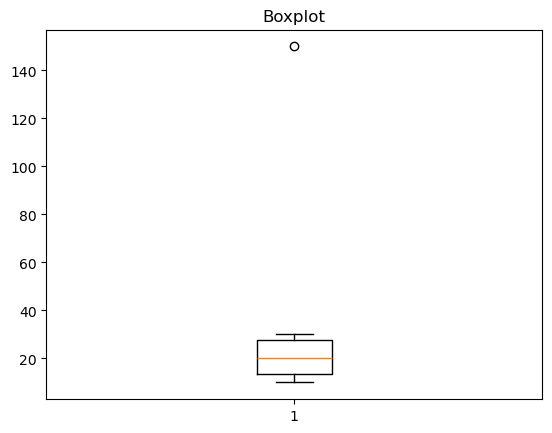

In [67]:
import matplotlib.pyplot as plt
import numpy as np

data = [10, 12, 15, 20, 25, 30, 150]
plt.boxplot(data)
plt.title("Boxplot")
plt.show()


### Scatter Plot:

    Useful for detecting outliers in bivariate data.

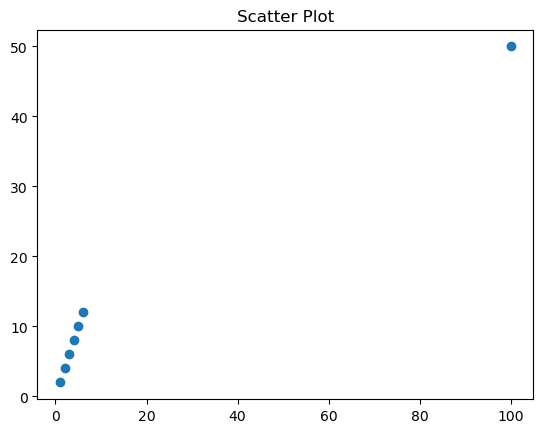

In [68]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 100]
y = [2, 4, 6, 8, 10, 12, 50]
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.show()


# b) Statistical Methods

## Z-Score:

    - Measures how far a value is from the mean in terms of standard deviations.
    - Values with a Z-score > 3 or < -3 are typically considered outliers.

In [69]:
from scipy.stats import zscore
import pandas as pd

data = pd.DataFrame({'Values': [10, 12, 15, 20, 25, 30, 150]})
data['Z-Score'] = zscore(data['Values'])
outliers = data[data['Z-Score'].abs() > 3]
print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [Values, Z-Score]
Index: []


In [9]:
import numpy as np
from scipy.stats import zscore

# Example dataset
data = np.array([10, 12, 14, 100])
z_scores = zscore(data)
outliers = data[np.abs(z_scores) > 2]
print("Outliers:", outliers)


Outliers: []


## Interquartile Range (IQR):

    Data points outside Q1 - 1.5*IQR or Q3 + 1.5*IQR are outliers.

In [70]:
Q1 = data['Values'].quantile(0.25)
Q3 = data['Values'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Values'] < (Q1 - 1.5 * IQR)) | (data['Values'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)


Outliers:
    Values   Z-Score
6     150  2.424742


# 5. Methods to Handle Outliers

## a) Remove Outliers

    Delete rows with extreme values if they are errors or irrelevant.

In [71]:
data_cleaned = data[(data['Z-Score'].abs() <= 3)]
print("Cleaned Data:\n", data_cleaned)


Cleaned Data:
    Values   Z-Score
0      10 -0.590800
1      12 -0.547721
2      15 -0.483102
3      20 -0.375404
4      25 -0.267706
5      30 -0.160008
6     150  2.424742


# b) Transform Data

    Apply transformations (e.g., log, square root) to reduce the impact of outliers.

In [73]:
import numpy as np
data['Log-Transformed'] = np.log(data['Values'] + 1)


# c) Replace Outliers

    ## Replace outliers with:

        ### Mean/Median:

In [75]:
median_value = data['Values'].median()
data['Values'] = data['Values'].apply(lambda x: median_value if abs(x - data['Values'].mean()) > 3 * data['Values'].std() else x)


### Capping:
    Replace outliers with the nearest non-outlier boundary (e.g., Q1 - 1.5*IQR or Q3 + 1.5*IQR).

# d) Use Robust Models

    Algorithms like Decision Trees or Random Forests are less sensitive to outliers.

# Key Takeaways

- Outliers are data points that deviate significantly from other observations.
- They can distort statistical analysis, visualizations, and model performance.
- Handling outliers involves detection (e.g., boxplots, Z-score, IQR) and remediation (e.g., removal, transformation, or capping).
- Properly handling outliers ensures cleaner, more reliable datasets and improves machine learning outcomes.

# Q. 7 You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are someOF Ttechniques you can use to handle the missing data in your analysis?

When dealing with missing data in a customer dataset, it is essential to address the issue effectively to maintain data integrity and improve the quality of analysis. 

- Imputation (Mean/Median/Mode).
- Predictive modeling.
- Using domain knowledge to infer values.
- Ignoring or excluding missing data when negligible.
- 
Below are some commonly used techniques to handle missing data, along with their descriptions and examples.

## 1. Remove Missing Data

**a) Remove Rows with Missing Data**

    If the proportion of missing data is small, you can safely remove rows containing missing values.



In [76]:
import pandas as pd

# Example dataset
data = pd.DataFrame({'CustomerID': [1, 2, 3, 4],
                     'Age': [25, 30, None, 40],
                     'Income': [50000, 60000, None, 80000]})

# Drop rows with missing values
data_cleaned = data.dropna()
print("After Dropping Rows:\n", data_cleaned)


After Dropping Rows:
    CustomerID   Age   Income
0           1  25.0  50000.0
1           2  30.0  60000.0
3           4  40.0  80000.0


b) Remove Columns with Missing Data
If an entire column has too many missing values and is not crucial for analysis, remove it.

In [77]:
# Drop columns with missing values
data_cleaned = data.dropna(axis=1)
print("After Dropping Columns:\n", data_cleaned)


After Dropping Columns:
    CustomerID
0           1
1           2
2           3
3           4


# 2. Impute Missing Values
a) Mean Imputation
Replace missing numerical values with the mean of the column.

In [78]:
# Fill missing values with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
print("After Mean Imputation:\n", data)


After Mean Imputation:
    CustomerID        Age   Income
0           1  25.000000  50000.0
1           2  30.000000  60000.0
2           3  31.666667      NaN
3           4  40.000000  80000.0


b) Median Imputation
Replace missing numerical values with the median, useful for skewed data.

In [79]:
# Fill missing values with median
data['Income'] = data['Income'].fillna(data['Income'].median())
print("After Median Imputation:\n", data)


After Median Imputation:
    CustomerID        Age   Income
0           1  25.000000  50000.0
1           2  30.000000  60000.0
2           3  31.666667  60000.0
3           4  40.000000  80000.0


c) Mode Imputation
Replace missing categorical values with the mode (most frequent value).

In [80]:
# Add a categorical column
data['City'] = ['New York', 'Los Angeles', None, 'Chicago']

# Fill missing values with mode
data['City'] = data['City'].fillna(data['City'].mode()[0])
print("After Mode Imputation:\n", data)


After Mode Imputation:
    CustomerID        Age   Income         City
0           1  25.000000  50000.0     New York
1           2  30.000000  60000.0  Los Angeles
2           3  31.666667  60000.0      Chicago
3           4  40.000000  80000.0      Chicago


3. Predict Missing Values
Use machine learning models to predict and fill missing values based on other features.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Example dataset
data = pd.DataFrame({'Age': [25, 30, None, 40], 'Income': [50000, 60000, 70000, None]})

# Use SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=['Age', 'Income'])
print("After Predictive Imputation:\n", data_imputed)


4. Interpolation
Estimate missing values using interpolation techniques, particularly for time series data.

In [ ]:
# Linear interpolation for missing values
data['Age'] = data['Age'].interpolate(method='linear')
print("After Linear Interpolation:\n", data)


5. Forward or Backward Fill
a) Forward Fill
Propagate the last valid value forward to fill missing data.

In [ ]:
# Forward fill
data['Age'] = data['Age'].fillna(method='ffill')
print("After Forward Fill:\n", data)


b) Backward Fill
Propagate the next valid value backward to fill missing data.

In [ ]:
# Backward fill
data['Income'] = data['Income'].fillna(method='bfill')
print("After Backward Fill:\n", data)


6. Add Indicator Variables
Add a binary column to indicate whether data was missing for a feature.



In [ ]:
# Add indicator for missing Age
data['Age_missing'] = data['Age'].isnull().astype(int)
print("After Adding Indicator:\n", data)


7. Advanced Techniques
a) K-Nearest Neighbors Imputation (KNN)
Replace missing values using the average of the nearest neighbors.

In [ ]:
from sklearn.impute import KNNImputer

# Example dataset
data = pd.DataFrame({'Age': [25, 30, None, 40], 'Income': [50000, 60000, 70000, None]})

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
data_imputed = knn_imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=['Age', 'Income'])
print("After KNN Imputation:\n", data_imputed)


b) Multivariate Imputation by Chained Equations (MICE)
Iteratively estimates missing values using regression models for other features.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Apply Iterative Imputer
mice_imputer = IterativeImputer(random_state=42)
data_imputed = mice_imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=['Age', 'Income'])
print("After MICE Imputation:\n", data_imputed)


Key Considerations
Proportion of Missing Data:

If the proportion is small, deletion or imputation is safe.
If it’s large, advanced techniques like KNN or MICE are preferred.
Type of Missing Data:

MCAR (Missing Completely at Random): Imputation or deletion is acceptable.
MAR (Missing at Random): Imputation techniques like MICE or predictive models are effective.
MNAR (Missing Not at Random): Requires domain knowledge for handling.
Feature Importance:

Decide whether to impute or drop a feature based on its importance in the analysis.
By applying these techniques, you can effectively handle missing data and ensure that your customer analysis yields accurate and meaningful insights.

# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are 
some strategies you can use to determine if the missing data is missing at random or if there is a patter 
to the missing data?

# Strategies to Determine if Missing Data is Random or Patterned
When working with large datasets with missing values, it is crucial to understand whether the missing data is:

Missing Completely at Random (MCAR):

Missing values are unrelated to any observed or unobserved data.
Example: A sensor fails randomly in different locations without a pattern.
Missing at Random (MAR):

Missing values are related to observed data but not the missing data itself.
Example: Income data missing only for certain age groups.
Missing Not at Random (MNAR):

Missing values depend on the value of the missing data itself or other hidden factors.
Example: People with high incomes might choose not to disclose their salaries.
To analyze whether missing data is random or patterned, follow these strategies:

1. Visual Inspection
a) Missing Data Heatmap
Use visualizations to identify patterns in missing data.
python
Copy code


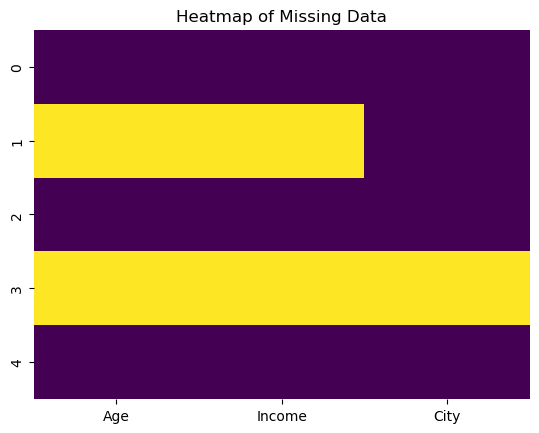

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Age': [25, None, 35, None, 45],
    'Income': [50000, None, 60000, None, 80000],
    'City': ['New York', 'Los Angeles', 'Chicago', None, 'Houston']
})

# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.show()



# b) Pairwise Plots

- Plot relationships between features to see if missingness correlates with other variables.

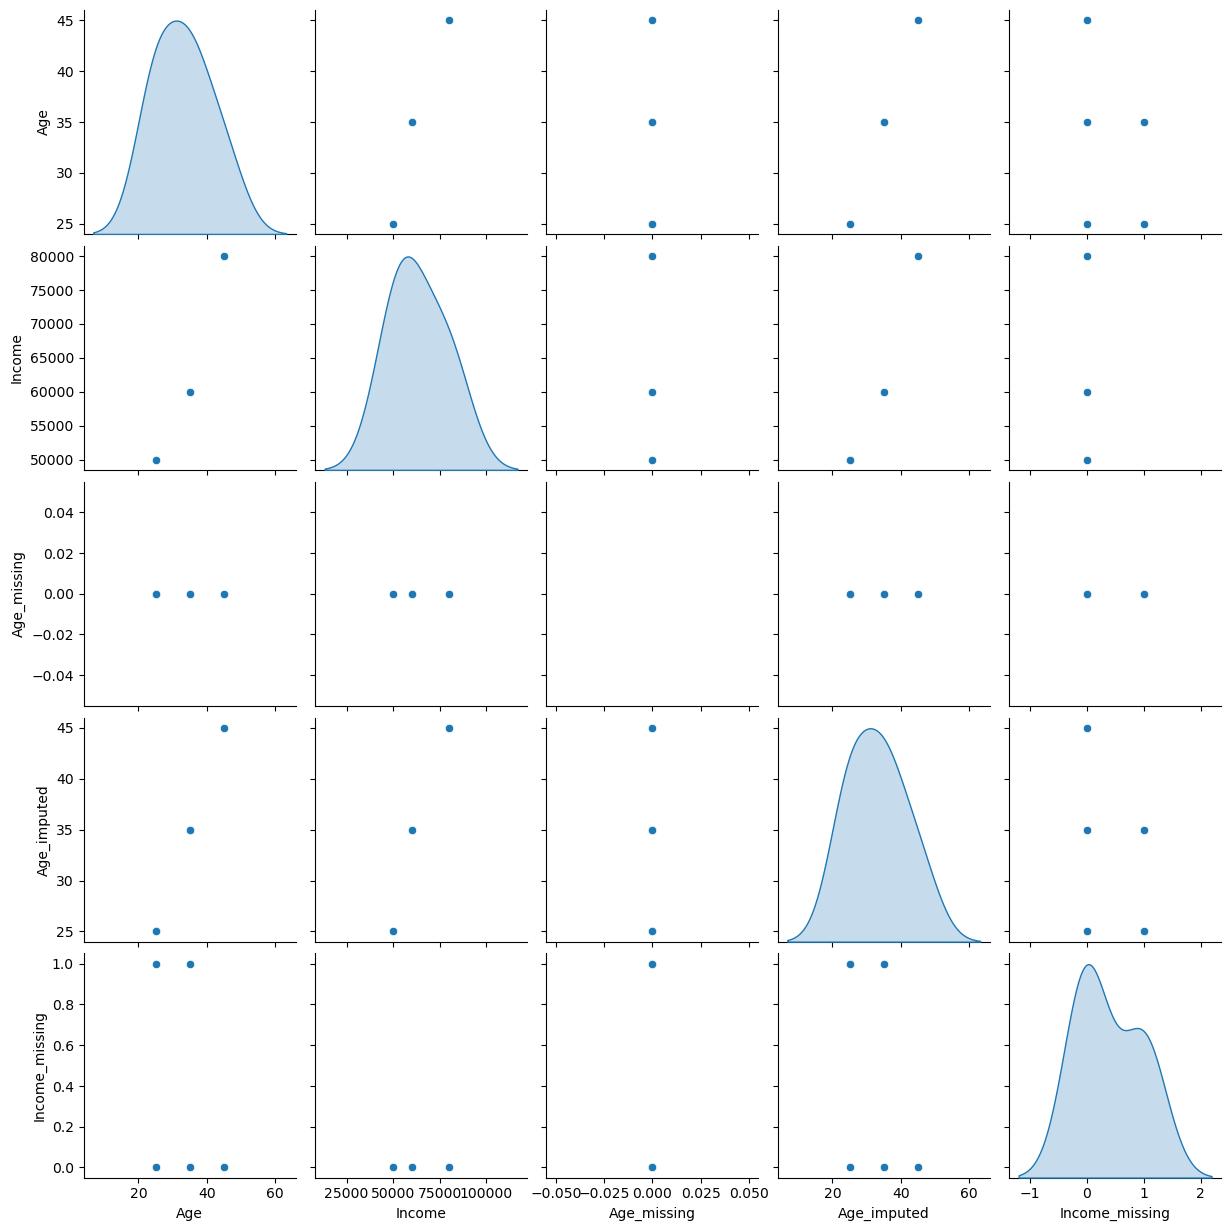

In [88]:
# Pairplot to observe patterns
sns.pairplot(data, diag_kind="kde")
plt.show()


# 2. Statistical Tests

## a) Little’s MCAR Test

    - A statistical test to check if data is MCAR.
    - If the p-value is > 0.05, data is likely MCAR.
    Example (Using the statsmodels library):
    
As the test_mcar function is not available in the statsmodels library. It was either removed or not implemented in your version of the library. Instead, you can use other libraries or write a custom implementation to check if data is missing completely at random (MCAR).



# Alternative Methods to Test for MCAR

## 1. Use Missingno Library for Visualization
The missingno library provides a visual way to inspect missing data.




In [90]:
! pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


<Axes: >

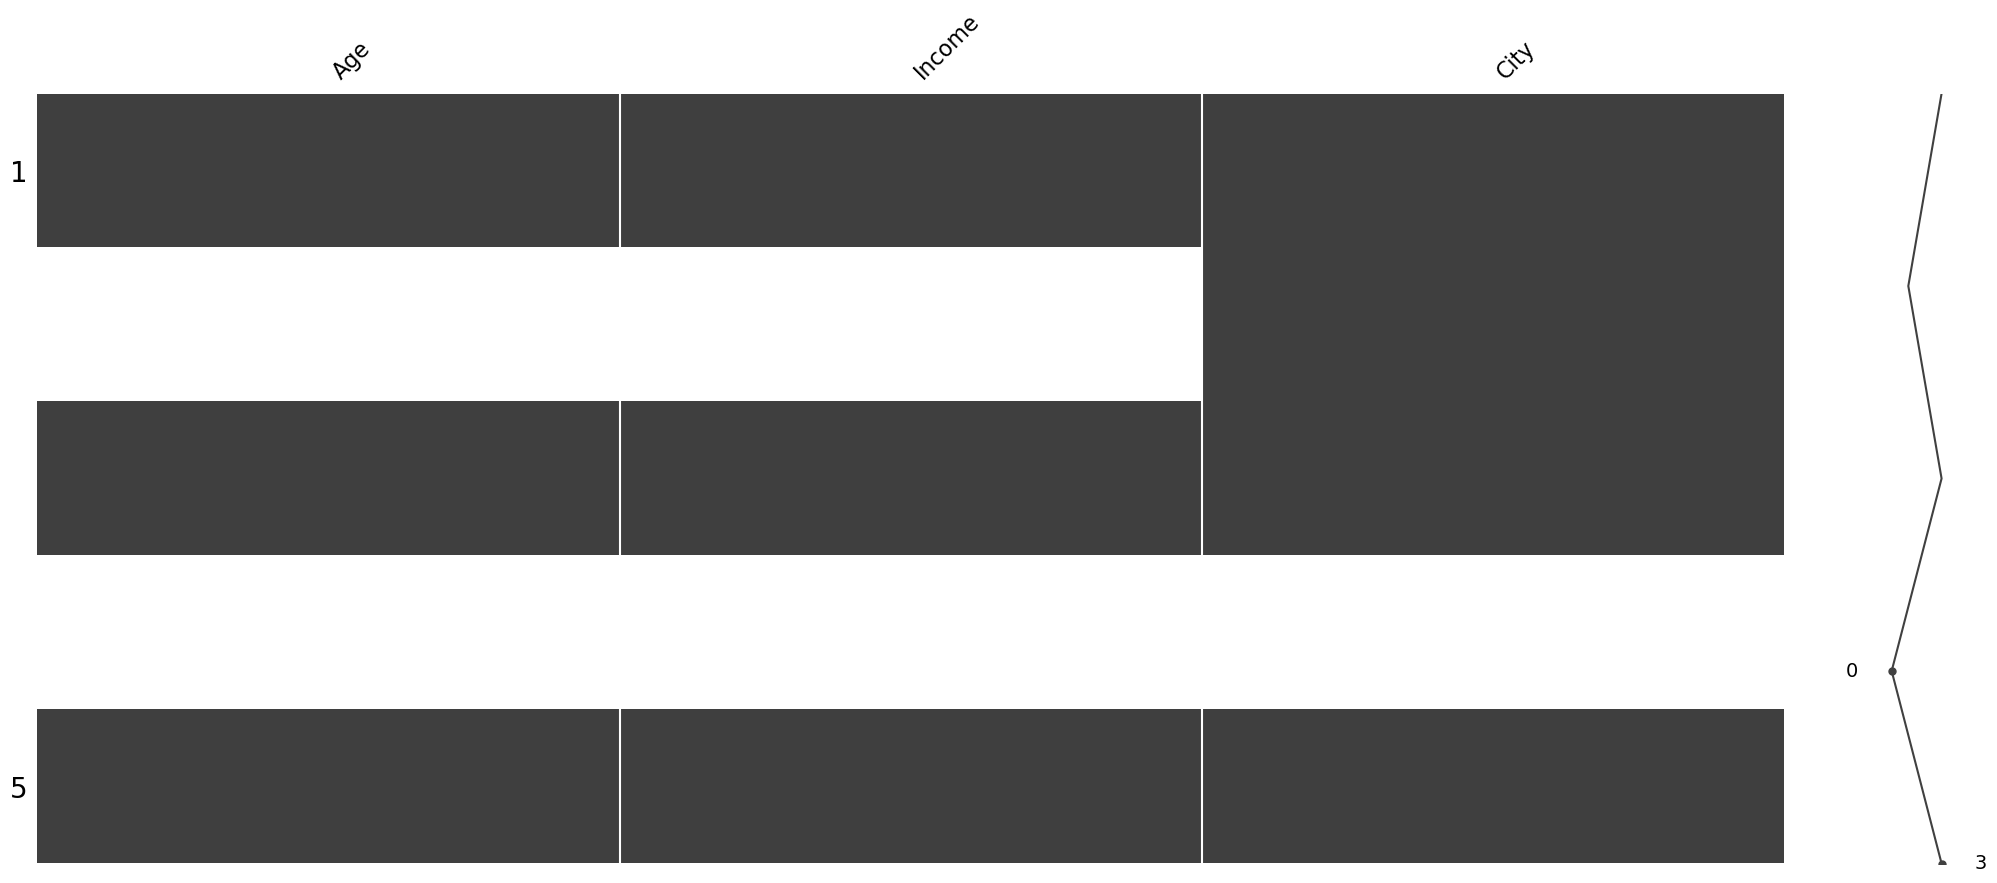

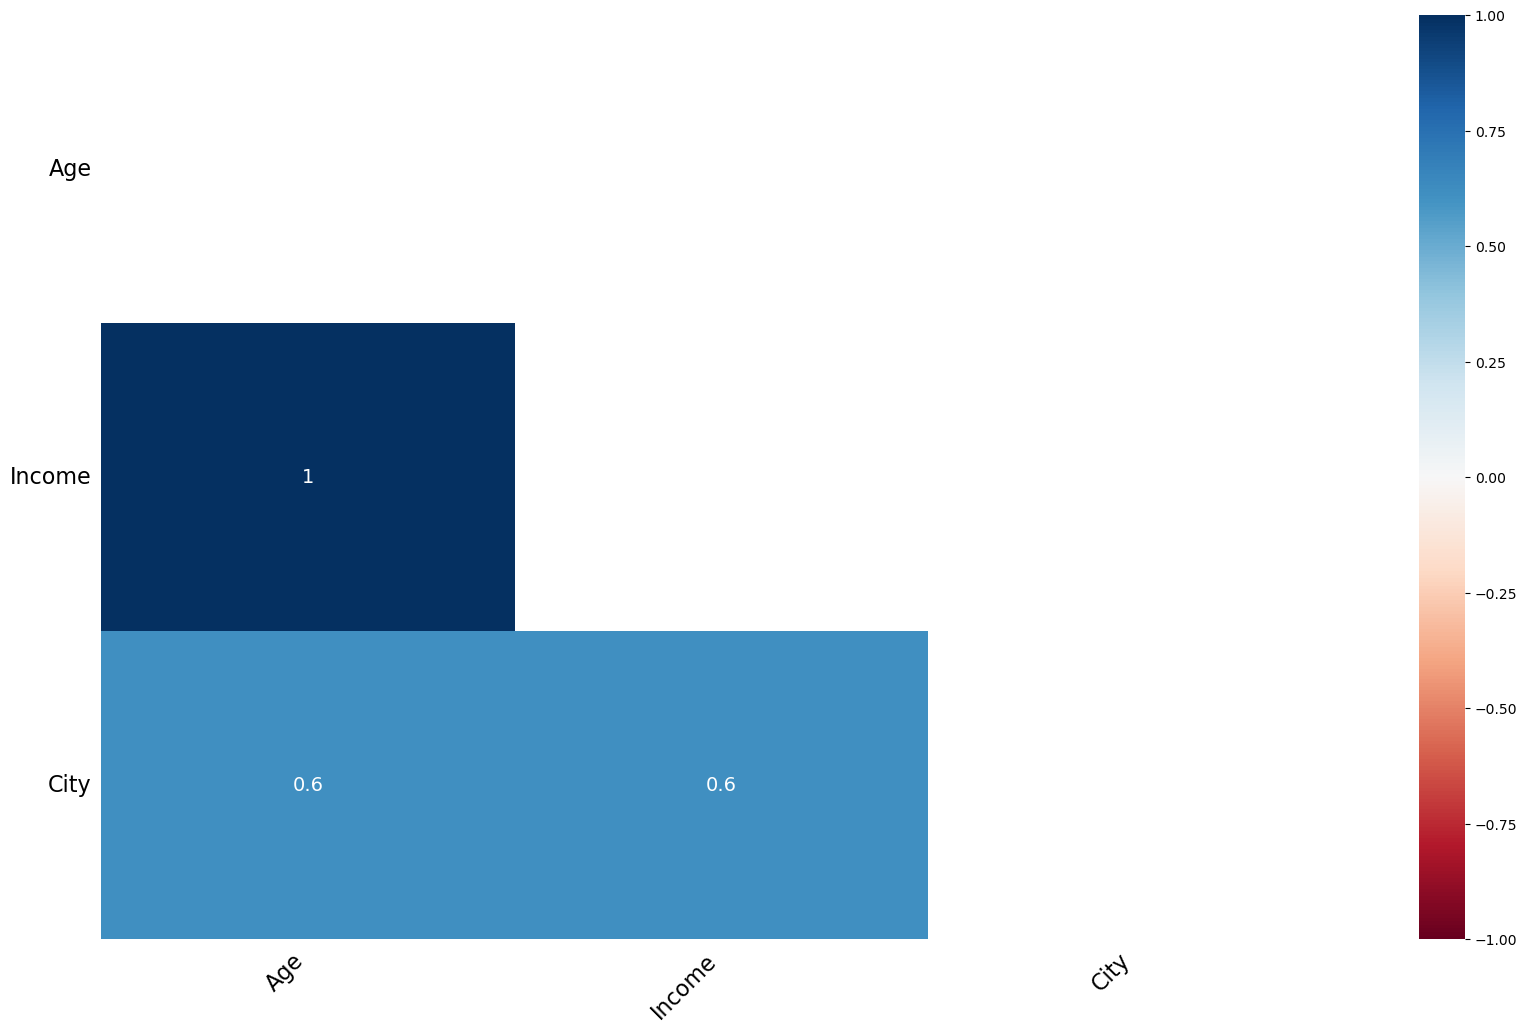

In [91]:
import missingno as msno
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Age': [25, None, 35, None, 45],
    'Income': [50000, None, 60000, None, 80000],
    'City': ['New York', 'Los Angeles', 'Chicago', None, 'Houston']
})

# Visualize missing data
msno.matrix(data)
msno.heatmap(data)



2. Chi-Square Test for MCAR (Custom Implementation)
You can perform a chi-square test to determine if missingness is related to observed data.

In [92]:
from scipy.stats import chi2_contingency
import numpy as np

# Create missingness indicators
data['Age_missing'] = data['Age'].isnull().astype(int)
data['Income_missing'] = data['Income'].isnull().astype(int)

# Contingency table
contingency_table = pd.crosstab(data['Age_missing'], data['Income_missing'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)


Chi-Square Test Statistic: 1.7013888888888888
p-value: 0.1921064408679386


3. Hypothesis for MCAR
Null Hypothesis (H0): The data is MCAR (missingness is completely random).
Alternative Hypothesis (H1): The data is not MCAR (there is a pattern to the missingness).
If the p-value from the chi-square test is greater than 0.05, you fail to reject the null hypothesis, indicating that the data is likely MCAR.

4. Use Machine Learning to Predict Missingness
If you have missing indicators for each column, train a model to predict whether a value is missing. High accuracy suggests that missingness is related to observed data (not MCAR).

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = data.drop(columns=['Age_missing', 'Age'])
y = data['Age_missing']
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print("Accuracy of Missingness Prediction:", accuracy)


Accuracy of Missingness Prediction: 1.0


# 3. Correlation Analysis

## a) Correlation with Other Features

- Compute correlations between missingness indicators and observed features.

In [86]:
# Create missing indicators
data['Age_missing'] = data['Age'].isnull().astype(int)
data['Income_missing'] = data['Income'].isnull().astype(int)

# Correlation analysis
correlation_matrix = data.corr()
print("Correlation Matrix with Missing Indicators:\n", correlation_matrix)


ValueError: could not convert string to float: 'New York'

# b) Chi-Square Test (For Categorical Data)

- Check if missingness in one feature is associated with other categorical features.

In [85]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['City'], data['Age_missing'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)


Chi-Square Test Statistic: 0.0
p-value: 1.0


# 4. Imputation and Comparison

## a) Impute Missing Data

    - Impute missing values using various methods (e.g., mean, median).
    - Compare patterns in the dataset before and after imputation.

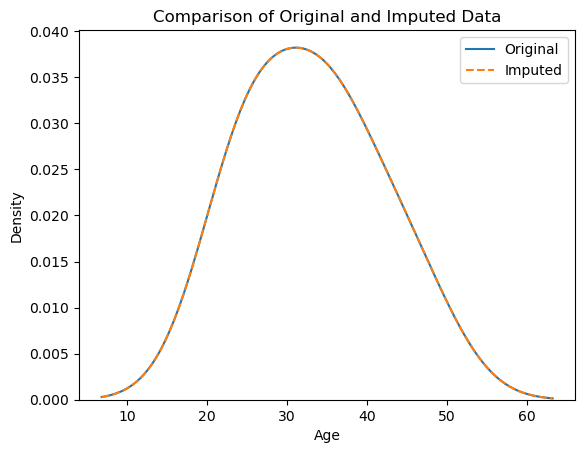

In [84]:
# Impute missing values with mean
data['Age_imputed'] = data['Age'].fillna(data['Age'].mean())

# Compare distributions
sns.kdeplot(data['Age'], label='Original')
sns.kdeplot(data['Age_imputed'], label='Imputed', linestyle="--")
plt.legend()
plt.title("Comparison of Original and Imputed Data")
plt.show()


# 5. Machine Learning Models to Predict Missingness

    - Train a machine learning model to predict the missingness indicator (isnull() column) based on other features. If the model achieves high accuracy, it indicates that missingness is related to observed data (i.e., MAR or MNAR).

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a feature for missingness
data['Age_missing'] = data['Age'].isnull().astype(int)

# Prepare data
X = data.drop(columns=['Age', 'Age_missing'])
y = data['Age_missing']
X = pd.get_dummies(X, drop_first=True)  # Encode categorical data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy of Missingness Prediction:", accuracy)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>)

# 6. Temporal or Sequential Analysis

- For time-series data, analyze missingness over time to identify patterns.

C:\Users\ac240\AppData\Local\Temp\ipykernel_31264\1930362750.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Age'] = data['Age'].fillna(method='ffill')  # Forward fill for visualization


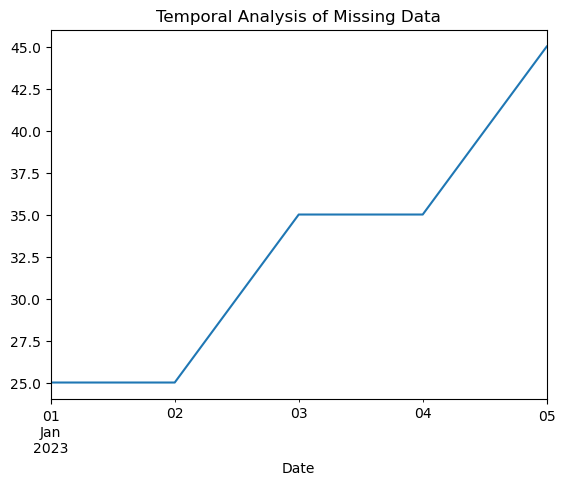

In [82]:
# Example: Filling missing data and visualizing
data['Date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')
data['Age'] = data['Age'].fillna(method='ffill')  # Forward fill for visualization
data.set_index('Date')['Age'].plot()
plt.title("Temporal Analysis of Missing Data")
plt.show()


# Key Takeaways

## Missing Completely at Random (MCAR):

- No relationship between missing values and any other feature.
- Visualizations and Little’s MCAR Test can help confirm this.

## Missing at Random (MAR):

- Missing values depend on observed features.
- Use correlation analysis or machine learning to detect patterns.

## Missing Not at Random (MNAR):

- Missingness depends on unobserved data or the missing feature itself.
- Often requires domain expertise or external data for resolution.

By applying these techniques, you can determine whether missing data is random or follows a pattern, guiding you to handle it appropriately for reliable analysis.

# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the 
dataset do not have the condition of interest, while a small percentage do. What are some strategies yo 
can use to evaluate the performance of your machine learning model on this imbalanced dataset?


In a medical diagnosis project, the dataset is often imbalanced, with most patients not having the condition of interest (majority class) and a small percentage having it (minority class). This imbalance can lead to biased models that favor the majority class, potentially missing critical diagnoses for patients in the minority class. Below are strategies to address this problem.

# Strategies for Handling Imbalanced Data
1. Re-sampling Techniques
    ## Up-sampling (Over-sampling) the Minority Class
        - Increases the number of samples in the minority class by duplicating existing instances or generating synthetic ones.
        - Prevents the model from being biased toward the majority class.
# Python Example:







In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

# Apply SMOTE with k_neighbors set to a valid value
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())



Class Distribution After SMOTE:
0    7
1    7
Name: count, dtype: int64


2. Down-sampling (Under-sampling) the Majority Class

- Reduces the size of the majority class to balance it with the minority class.
- This method can result in the loss of valuable information from the majority class.

# Python Example:

In [22]:
from sklearn.utils import resample

# Example dataset
data = pd.DataFrame({'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'Condition': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]})

# Separate classes
majority = data[data['Condition'] == 0]
minority = data[data['Condition'] == 1]

# Down-sample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

# Combine the two classes
balanced_data = pd.concat([majority_downsampled, minority])
print("Class Distribution After Down-Sampling:")
print(balanced_data['Condition'].value_counts())


Class Distribution After Down-Sampling:
Condition
0    3
1    3
Name: count, dtype: int64


2. Cost-Sensitive Learning

- Modify the learning algorithm to assign a higher penalty for misclassifying the minority class.
- Many models like decision trees, random forests, and support vector machines allow class weighting.

# Python Example:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example data
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Class weights
model = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)
print("Predicted Classes:", y_pred)


Predicted Classes: [1 0 0]


3. Anomaly Detection Techniques

- Treat the minority class as an anomaly and use anomaly detection algorithms like Isolation Forest or One-Class SVM.

4. Performance Metrics

## Use evaluation metrics that are robust to class imbalance:
- Precision and Recall
- F1-score
- ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
- Precision-Recall Curve

Avoid metrics like accuracy, which can be misleading in imbalanced datasets.

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

# Example predictions
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

ROC-AUC Score: 0.9


# Metrics:

- Use F1-score, Precision, Recall, ROC-AUC.

# Sampling:

- Up-sample minority class using SMOTE.
- Down-sample majority class.

# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is 
unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to 
balance the dataset and down-sample the majority class?

When working with an unbalanced dataset where the majority class (e.g., satisfied customers) dominates, down-sampling the majority class is an effective method to balance the dataset. Below, we explore techniques to achieve this, accompanied by explanations and executable Python code.

# Methods to Balance Dataset by Down-Sampling
1. Random Under-Sampling

- Randomly remove samples from the majority class to match the size of the minority class.
- Reduces dataset size, which might result in a loss of information.

# Python Example:

In [15]:
import pandas as pd
from sklearn.utils import resample

# Example dataset
data = pd.DataFrame({'Customer': range(1, 101),
                     'Satisfaction': [1]*80 + [0]*20})  # 80 satisfied, 20 unsatisfied

# Separate majority and minority classes
majority = data[data['Satisfaction'] == 1]
minority = data[data['Satisfaction'] == 0]

# Down-sample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

# Combine minority class with downsampled majority class
balanced_data = pd.concat([minority, majority_downsampled])

# Class distribution after down-sampling
print("Class Distribution After Down-Sampling:")
print(balanced_data['Satisfaction'].value_counts())


Class Distribution After Down-Sampling:
Satisfaction
0    20
1    20
Name: count, dtype: int64


# 2. Cluster-Based Under-Sampling

- Use clustering to identify representative samples in the majority class, then retain only those for balancing.
- Retains the diversity of the majority class.

# Python Example:

In [16]:
from sklearn.cluster import KMeans

# Features (random data for demonstration)
X = pd.DataFrame({'Feature1': range(1, 101), 'Feature2': range(101, 201)})
y = [1]*80 + [0]*20  # Target: 80 satisfied, 20 unsatisfied

# Cluster majority class
majority_indices = [i for i, val in enumerate(y) if val == 1]
X_majority = X.iloc[majority_indices]
kmeans = KMeans(n_clusters=20, random_state=42).fit(X_majority)

# Select one sample per cluster to down-sample
selected_indices = [X_majority.index[i] for i in range(len(kmeans.labels_))]
X_downsampled = X.iloc[selected_indices]
y_downsampled = [1]*len(selected_indices)

# Combine down-sampled majority with minority
minority_indices = [i for i, val in enumerate(y) if val == 0]
X_minority = X.iloc[minority_indices]
y_minority = [0]*len(minority_indices)

X_balanced = pd.concat([X_downsampled, X_minority])
y_balanced = y_downsampled + y_minority

print("Class Distribution After Cluster-Based Down-Sampling:")
print(pd.Series(y_balanced).value_counts())


Class Distribution After Cluster-Based Down-Sampling:
1    80
0    20
Name: count, dtype: int64


C:\Users\ac240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 3. Stratified Sampling

Ensures proportional representation of minority and majority classes across various features.

# Python Example:

In [17]:
from sklearn.model_selection import train_test_split

# Stratified sampling to balance classes
X = pd.DataFrame({'Feature1': range(1, 101), 'Feature2': range(101, 201)})
y = [1]*80 + [0]*20

X_balanced, _, y_balanced, _ = train_test_split(X, y, stratify=y, test_size=0.75, random_state=42)

print("Class Distribution After Stratified Sampling:")
print(pd.Series(y_balanced).value_counts())


Class Distribution After Stratified Sampling:
1    20
0     5
Name: count, dtype: int64


# Key Considerations

# Information Loss: 

- Down-sampling can result in the loss of important information from the majority class.
- Consider whether the remaining samples represent the diversity of the original majority class.

# When to Use Down-Sampling:
Small datasets where increasing the size of the minority class (e.g., through up-sampling) is not feasible.

# Evaluation Metrics:
After balancing, use appropriate metrics (e.g., precision, recall, F1-score) to evaluate model performance on the minority class.

# Practical Scenarios

**Customer Satisfaction Analysis:**

- Majority: Satisfied customers.
- Minority: Unsatisfied customers.
- Down-sample satisfied customers to ensure the model learns to predict unsatisfied customers accurately.

**Sentiment Analysis in Text:**

- Majority: Positive reviews.
- Minority: Negative reviews.
- Apply down-sampling to balance and improve minority prediction accuracy.

These methods ensure that the dataset is balanced effectively, reducing bias and enhancing model performance, especially for minority class predictions.

In [13]:
# Down-sampling Majority Class:

from sklearn.utils import resample
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np

# Create an example dataset
X, y = make_classification(weights=[0.9, 0.1], n_classes=2, n_samples=1000)
print("Original class distribution:", Counter(y))

# Separate the majority and minority classes
X_majority = X[y == 0]
y_majority = y[y == 0]
X_minority = X[y == 1]
y_minority = y[y == 1]

# Down-sample the majority class
X_majority_downsampled, y_majority_downsampled = resample(
    X_majority, 
    y_majority, 
    n_samples=len(y_minority),  # Match the size of the minority class
    replace=False, 
    random_state=42
)

# Combine the downsampled majority class with the minority class
X_downsampled = np.vstack((X_majority_downsampled, X_minority))
y_downsampled = np.hstack((y_majority_downsampled, y_minority))

print("Down-sampled class distribution:", Counter(y_downsampled))



Original class distribution: Counter({0: 895, 1: 105})
Down-sampled class distribution: Counter({0: 105, 1: 105})


# Explanation:

**Separate Classes:**

- X_majority and y_majority contain the features and labels for the majority class.
- X_minority and y_minority contain the features and labels for the minority class.

**Down-Sample Majority Class:**

- Use resample to randomly select a subset of the majority class that matches the size of the minority class (len(y_minority)).

**Combine the Classes:**

- Combine the downsampled majority class with the minority class to create a balanced dataset.

**Count Class Distribution:**

- Use Counter to verify the class distribution after down-sampling.

 # Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class? Give the solution of each question in detail


When working with imbalanced datasets, where the occurrence of a rare event (minority class) is significantly less frequent than the majority class, it's crucial to balance the dataset for effective modeling. Below are the methods to up-sample the minority class with detailed explanations and Python code.

# Methods to Balance and Up-sample Minority Class

1. **Random Over-Sampling**
- Duplicate existing samples of the minority class to increase its representation.
- Simple but can lead to overfitting.

# Python Example:



In [ ]:
import pandas as pd
from sklearn.utils import resample

# Example dataset
data = pd.DataFrame({'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'Target': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]})

# Separate majority and minority classes
majority = data[data['Target'] == 0]
minority = data[data['Target'] == 1]

# Up-sample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine majority and up-sampled minority class
balanced_data = pd.concat([majority, minority_upsampled])
print("Class Distribution After Up-sampling:")
print(balanced_data['Target'].value_counts())


**2. Synthetic Minority Oversampling Technique (SMOTE)**

- Generates synthetic samples for the minority class by interpolating between existing samples.
- Avoids the problem of overfitting inherent in random over-sampling.

# Python Example:

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Feature matrix (X) and target vector (y)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original Dataset Shape:", X.shape)
print("Resampled Dataset Shape:", X_resampled.shape)
print("Class Distribution After SMOTE:", pd.Series(y_resampled).value_counts())


**3. Adaptive Synthetic Sampling (ADASYN)**

- An extension of SMOTE that adapts to the density of minority class instances and generates samples accordingly.
- Focuses on generating samples for harder-to-learn regions.

# Python Example:

In [ ]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

print("Class Distribution After ADASYN:", pd.Series(y_resampled).value_counts())


4. Data Augmentation

- Augment data by introducing noise or transformations.
- Useful in non-tabular data like images or text.

# Python Example for Numerical Features:

In [ ]:
import numpy as np

# Original minority class data
original_data = np.array([10, 20, 30])

# Augment data by adding random noise
augmented_data = original_data + np.random.normal(0, 2, size=original_data.shape)

print("Original Data:", original_data)
print("Augmented Data:", augmented_data)


# Key Considerations

**Model Overfitting:** Be cautious with random oversampling as it duplicates data, potentially causing overfitting.
**Class Distribution Metrics:** Always check the new class distribution to ensure the balance.
**Model Evaluation:** Use metrics like F1-score, precision-recall curve, and AUC to evaluate the model's performance on imbalanced data.